In [1]:
import sys
# sys.path.append('G:/My Drive/Research/adaptation_abm/code')
sys.path.append('/home/twilliams/adaptation_abm/code')
import model.model as mod_code
import plot.single_run as plt_single
import model.base_inputs as inputs_base
import imp
import numpy as np
import pickle
imp.reload(mod_code)
import matplotlib.pyplot as plt

In [2]:
f = '../../outputs/2019_10_15_4/POM/100000_10reps/input_params_0.pkl'
inputs = pickle.load(open(f, 'rb'))
inputs['adaptation']['burnin_period'] = 10

In [12]:
inputs['model']['seed'] = 0
inputs['model']['T'] = 200
# inputs['agents']['wealth_init_mean'] *=1
# inputs['land']['random_effect_sd'] = 0.5
inputs['model']['n_agents'] = 300
inputs['agents']['land_area_multiplier'] = 1


# NEW FERT PARAMS
inp_base = inputs_base.compile()
inputs['agents']['risk_tolerance'] = inp_base['agents']['risk_tolerance']
inputs['agents']['fert_kg'] = inp_base['agents']['fert_kg']
inputs['agents']['fertilizer_cost'] = inp_base['agents']['fertilizer_cost']
inputs['agents']['nsim_utility'] = inp_base['agents']['nsim_utility']
inputs['agents']['fertilizer'] = inp_base['agents']['fertilizer'] # binary switch
inputs['agents']['fert_cash_constrained'] = inp_base['agents']['fert_cash_constrained'] # binary switch
inputs['agents']['fert_use_savings'] = inp_base['agents']['fert_use_savings']

# self specified
inputs['agents']['fertilizer_cost'] = 13.2
inputs['agents']['risk_tolerance'] = 3000
inputs['agents']['fert_kg'] = 50
inputs['agents']['fert_use_savings'] = True
inputs['agents']['fert_cash_constrained'] = True

In [19]:
m = mod_code.Model(inputs)
for t in range(m.T):
    m.step()

(-1, 1)

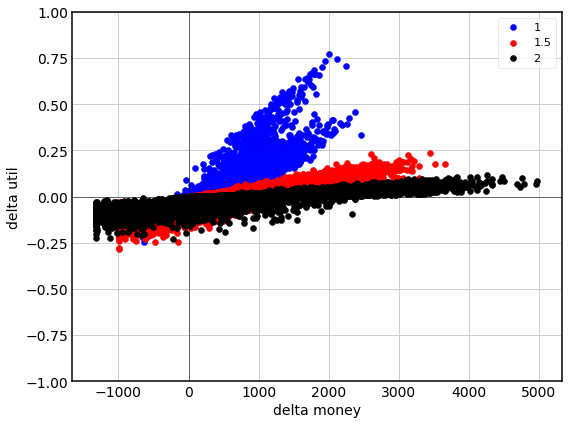

In [14]:
## plot fertilizer utilities
fig, ax = plt.subplots(figsize=(8,6))
delta_util = m.agents.util_fert - m.agents.util
delta_money = m.agents.util_fert_no_risk - m.agents.util_no_risk
lands = m.agents.land_area_init
for l, la in enumerate(lands):
    ixs = m.agents.land_area == la
    ax.scatter(delta_money[:,ixs], delta_util[:,ixs], label=la)
ax.legend()
ax.set_xlabel('delta money')
ax.set_ylabel('delta util')
ax.axhline(0,color='k',lw=0.5)
ax.axvline(0,color='k',lw=0.5)
ax.set_ylim([-1,1])

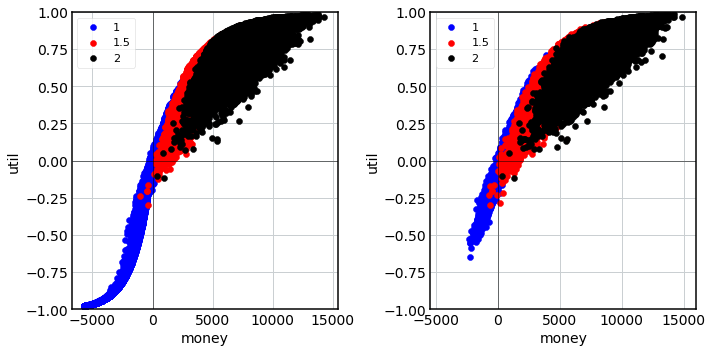

In [15]:
## plot fertilizer utilities
fig, axs = plt.subplots(1,2,figsize=(10,5))
delta_util = m.agents.util_fert - m.agents.util
delta_money = m.agents.util_fert_no_risk - m.agents.util_no_risk
lands = m.agents.land_area_init
for l, la in enumerate(lands):
    ixs = m.agents.land_area == la
    axs[0].scatter(m.agents.util_no_risk[:,ixs], m.agents.util[:,ixs], label=la)
    axs[1].scatter(m.agents.util_fert_no_risk[:,ixs], m.agents.util_fert[:,ixs], label=la)
for ax in axs:
    ax.set_xlabel('money')
    ax.set_ylabel('util')
    ax.legend()
    ax.axhline(0,color='k',lw=0.5)
    ax.axvline(0,color='k',lw=0.5)
    ax.set_ylim([-1,1])

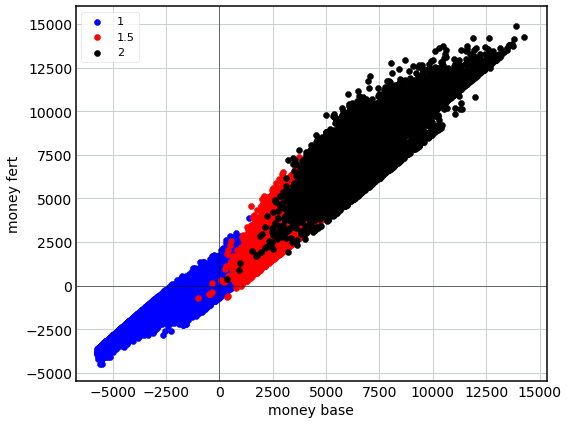

In [16]:
## plot fertilizer utilities
fig, ax = plt.subplots(figsize=(8,6))
delta_util = m.agents.util_fert - m.agents.util
delta_money = m.agents.util_fert_no_risk - m.agents.util_no_risk
lands = m.agents.land_area_init
for l, la in enumerate(lands):
    ixs = m.agents.land_area == la
    ax.scatter(m.agents.util_no_risk[:,ixs],m.agents.util_fert_no_risk[:,ixs], label=la)
ax.legend()
ax.set_xlabel('money base')
ax.set_ylabel('money fert')
ax.axhline(0,color='k',lw=0.5)
ax.axvline(0,color='k',lw=0.5)

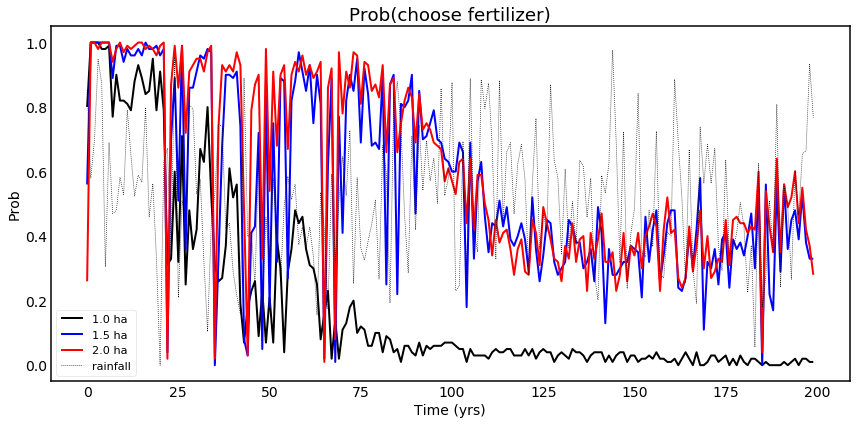

In [17]:
pp = plt_single.type_fertilizer(m, savedir=False)

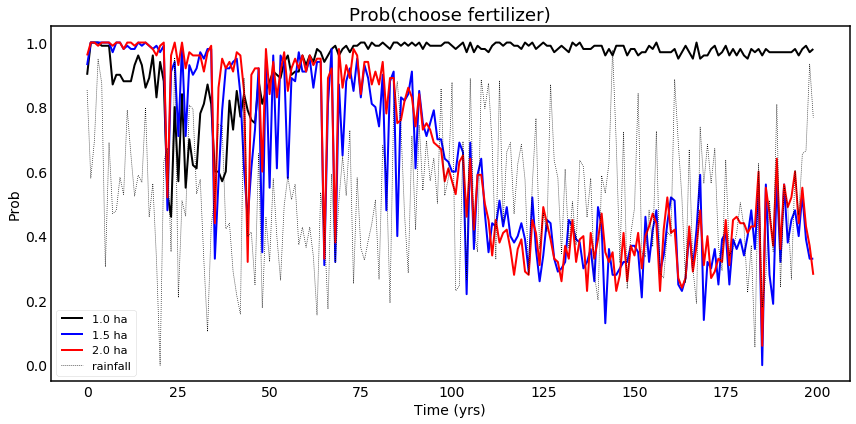

In [18]:
pp = plt_single.type_fertilizer_no_risk(m, savedir=False)

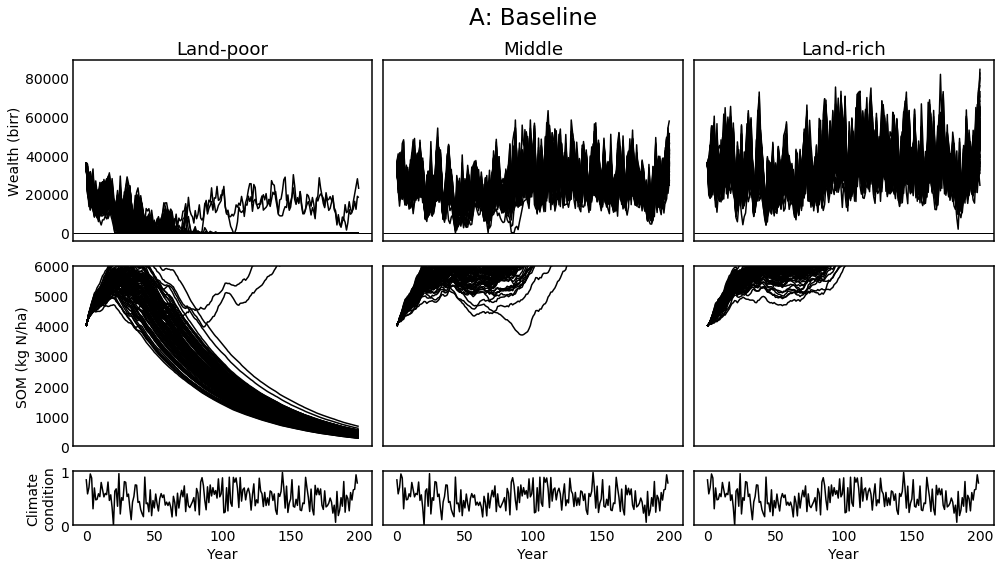

In [10]:
pp = plt_single.separate(m, savedir=False)

In [11]:
# imp.reload(plt_single)
# plt_single.main(m, save=False)